In [0]:
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from torch.autograd import Variable

In [2]:
# scalar
x = torch.rand(10)
x.size()

torch.Size([10])

In [3]:
# vector
temp = torch.FloatTensor([23,24,24.5,26,27.2,23.0])
temp.size()

torch.Size([6])

In [4]:
# matrix
w = torch.randn(5,3, dtype=torch.float)
x = torch.tensor([[1.0,2.0], [3.0,4.0], [5.0,6.0]])

print("w size:", w.size())
print("x size:", x.size())
print("w:", w)
print("x:", x)
print("----------------------------------------")

wx = torch.mm(w,x) # w의 행은 5, x의 열은 2, 즉 shape는 [5, 2]입니다.
print("wx size:", wx.size())
print("wx:", wx)

w size: torch.Size([5, 3])
x size: torch.Size([3, 2])
w: tensor([[ 1.3008,  0.8971,  0.5717],
        [ 0.2297, -1.1291, -0.8266],
        [-0.7696,  1.6291, -0.0326],
        [-1.0243,  0.3966,  1.4686],
        [ 0.7898, -0.3823, -1.0851]])
x: tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])
----------------------------------------
wx size: torch.Size([5, 2])
wx: tensor([[ 6.8504,  9.6199],
        [-7.2908, -9.0168],
        [ 3.9546,  4.7814],
        [ 7.5086,  8.3496],
        [-5.7828, -6.4604]])


# **연산하기**

In [5]:
a = torch.rand(2,2)
b = torch.rand(2,2)
c = a + b
d = torch.add(a,b)

d

tensor([[0.6759, 1.5951],
        [0.9154, 1.2920]])

In [6]:
a

tensor([[0.1538, 0.6445],
        [0.5516, 0.8102]])

In [7]:
b

tensor([[0.5221, 0.9507],
        [0.3638, 0.4818]])

In [8]:
# 인라인 덧셈
a.add_(5)

tensor([[5.1538, 5.6445],
        [5.5516, 5.8102]])

In [9]:
# 다른 tensor와 곱셈
a.mul(b)

tensor([[2.6906, 5.3661],
        [2.0197, 2.7994]])

In [10]:
a*b

tensor([[2.6906, 5.3661],
        [2.0197, 2.7994]])

In [11]:
# 인라인 곱셈
a.mul_(b)

tensor([[2.6906, 5.3661],
        [2.0197, 2.7994]])

GPU에서 동작하는 곱셈 연산

In [14]:
# 조금 시간이 걸림
a = torch.rand(10000,10000)
b = torch.rand(10000,10000)

a.matmul(b)

tensor([[2457.6809, 2456.7036, 2490.9768,  ..., 2476.1069, 2475.7317,
         2454.7476],
        [2470.9939, 2475.8042, 2522.4285,  ..., 2495.4448, 2479.3811,
         2475.5012],
        [2497.3235, 2479.7910, 2544.2532,  ..., 2508.8916, 2516.0818,
         2503.6519],
        ...,
        [2493.8064, 2494.7822, 2521.3503,  ..., 2508.5698, 2509.4697,
         2507.8889],
        [2470.2668, 2451.2815, 2498.2673,  ..., 2476.9768, 2468.3064,
         2460.5193],
        [2514.2351, 2470.2974, 2532.3450,  ..., 2497.1753, 2499.8940,
         2508.1299]])

In [15]:
# CPU용 텐서 객채를 GPU 텐서로 변환
# 매우빠름 / 바로 결과가 뜸
from torch import cuda 

a = a.cuda()
b = b.cuda()

a.matmul(b)

tensor([[2457.6797, 2456.6914, 2490.9761,  ..., 2476.1128, 2475.7341,
         2454.7483],
        [2470.9929, 2475.8052, 2522.4241,  ..., 2495.4409, 2479.3816,
         2475.5027],
        [2497.3242, 2479.7847, 2544.2502,  ..., 2508.8872, 2516.0852,
         2503.6528],
        ...,
        [2493.8059, 2494.7786, 2521.3508,  ..., 2508.5735, 2509.4695,
         2507.8872],
        [2470.2617, 2451.2805, 2498.2681,  ..., 2476.9766, 2468.3027,
         2460.5159],
        [2514.2395, 2470.3032, 2532.3428,  ..., 2497.1812, 2499.8979,
         2508.1318]], device='cuda:0')

# **Autograd**

In [0]:
w = torch.tensor(1.0, requires_grad=True)

In [29]:
a = w*3
l = a**2
l.backward()
print(w.grad)
print('l을 w로 미분한 값은 {}'.format(w.grad))

tensor(18.)
l을 w로 미분한 값은 18.0


Pytorch로 시작하는 딥러닝 책에 기재된 코드

In [18]:
x = Variable(torch.ones(2,2),requires_grad=True)
y = x.mean()

y.backward()

x.grad

tensor([[0.2500, 0.2500],
        [0.2500, 0.2500]])

In [20]:
y

tensor(1., grad_fn=<MeanBackward0>)

In [21]:
x.data

tensor([[1., 1.],
        [1., 1.]])

In [22]:
y.grad_fn

# **신경망에 사용할 데이터 생성하기**

> `get_data()`에 대해 알아보자.

In [0]:
def get_data():
    train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
    train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
    dtype = torch.FloatTensor
    X = Variable(torch.from_numpy(train_X).type(dtype),requires_grad=False).view(17,1)
    y = Variable(torch.from_numpy(train_Y).type(dtype),requires_grad=False)
    return X,y

# 변수 x와 y의 크기는 각각 (17,1)과 (17)

**학습 파라미터 생성**

In [0]:
def get_weights():
    w = Variable(torch.randn(1),requires_grad = True)
    b = Variable(torch.randn(1),requires_grad=True)
    return w,b

**네트워크 구현**

In [0]:
def simple_network(x):
    y_pred = torch.matmul(x,w)+b
    return y_pred

In [26]:
# 파이토치로 신경망 구현하기 -- 훨씬 단순

import torch.nn as nn
f = nn.Linear(17,1) # Much simpler.
f

Linear(in_features=17, out_features=1, bias=True)

**오차 함수**

In [0]:
def loss_fn(y,y_pred):
    loss = (y_pred-y).pow(2).sum()
    for param in [w,b]:
        if not param.grad is None: param.grad.data.zero_()
    loss.backward()
    return loss.data[0]

**신경망 최적화**

In [0]:
def optimize(learning_rate):
    w.data -= learning_rate * w.grad.data
    b.data -= learning_rate * b.grad.data

# **데이터 로딩**

Dataset class, DataLoadr class 살펴보기.

In [0]:
#dataset class 정의

from torch.utils.data import Dataset
class DogsAndCatsDataset(Dataset):
    def __init__(self,):
        pass
    def __len__(self):
        pass
    def __getitem__(self,idx):
        pass

In [0]:
# DogsAndCatsDataset class 구현하기

class DogsAndCatsDataset(Dataset):
    def __init__(self,root_dir,size=(224,224)):
        self.files = glob(root_dir)
        self.size = size
    def __len__(self):
        return len(self.files)
    def __getitem__(self,idx):
        img = np.asarray(Image.open(self.files[idx]).resize(self.size))
        label = self.files[idx].split('/')[-2]
        return img,label

In [0]:
# DogsAndCatsDataset을 순회하는 DataLoader 정의

from torch.utils.data import Dataset, DataLoader

#dataloader = DataLoader(DogsAndCatsDataset,batch_size=32,num_workers=2)
#for imgs , labels in dataloader:
        #학습 데이터셋에 딥러닝 네트워크 적용
#    pass

# **Project 1 : 경사하강법으로 이미지 복원하기**

> 이미지 처리를 위해 만들어 두었던 weird_function() 함수에 실수로 버그가 들어가 100×100 픽셀의 오염된 미미지가 만들어졌다. 이 오염된 이미지와 오염되기 전 원본 이미지를 동시에 파일로 저장하려고 했으나, 모종의 이유로 원본 이미지 파일은 삭제된 상황. 다행히도 weird_function()의 소스코드는 남아 있다. 오염된 이미지와 weird_function()을 활용해 원본 이미지를 복원해보자.

In [0]:
import torch
import pickle
import matplotlib.pyplot as plt

In [31]:
# pickle이 작동 안 됨.

shp_original_img = (100, 100)
broken_image =  torch.FloatTensor(pickle.load(open('./broken_image.png', 'rb'),encoding='latin1' ) )

FileNotFoundError: ignored

# **파이토치로 구현하는 신경망**

In [0]:
import torch
import numpy
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [0]:
# train : 80 / test : 20

n_dim = 2
x_train, y_train = make_blobs(n_samples=80, n_features=n_dim, centers=[[1,1],[-1,-1],[1,-1],[-1,1]], shuffle=True, cluster_std=0.3)
x_test, y_test = make_blobs(n_samples=20, n_features=n_dim, centers=[[1,1],[-1,-1],[1,-1],[-1,1]], shuffle=True, cluster_std=0.3)

In [0]:
def label_map(y_, from_, to_):
    y = numpy.copy(y_)
    for f in from_:
        y[y_ == f] = to_
    return y

y_train = label_map(y_train, [0, 1], 0)
y_train = label_map(y_train, [2, 3], 1)
y_test = label_map(y_test, [0, 1], 0)
y_test = label_map(y_test, [2, 3], 1)

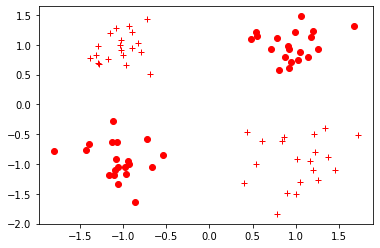

In [35]:
def vis_data(x,y = None, c = 'r'):
    if y is None:
        y = [None] * len(x)
    for x_, y_ in zip(x,y):
        if y_ is None:
            plt.plot(x_[0], x_[1], '*',markerfacecolor='none', markeredgecolor=c)
        else:
            plt.plot(x_[0], x_[1], c+'o' if y_ == 0 else c+'+')

plt.figure()
vis_data(x_train, y_train, c='r')
plt.show()

In [36]:
x_train = torch.FloatTensor(x_train)
print(x_train.shape)
x_test = torch.FloatTensor(x_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

torch.Size([80, 2])


In [0]:
class NeuralNet(torch.nn.Module):
        def __init__(self, input_size, hidden_size):
            super(NeuralNet, self).__init__()
            self.input_size = input_size
            self.hidden_size  = hidden_size
            self.linear_1 = torch.nn.Linear(self.input_size, self.hidden_size)
            self.relu = torch.nn.ReLU()
            self.linear_2 = torch.nn.Linear(self.hidden_size, 1)
            self.sigmoid = torch.nn.Sigmoid()
            
        def forward(self, input_tensor):
            linear1 = self.linear_1(input_tensor)
            relu = self.relu(linear1)
            linear2 = self.linear_2(relu)
            output = self.sigmoid(linear2)
            return output

In [0]:
model = NeuralNet(2, 5)
learning_rate = 0.03
criterion = torch.nn.BCELoss()
epochs = 20000
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [39]:
model.eval()
test_loss_before = criterion(model(x_test).squeeze(), y_test)
print('Before Training, test loss is {}'.format(test_loss_before.item()))

Before Training, test loss is 0.7443267107009888


In [40]:
# 향상시키기
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    train_output = model(x_train)
    train_loss = criterion(train_output.squeeze(), y_train)
    if epoch % 50000 == 0:
        print('Train loss at {} is {}'.format(epoch, train_loss.item()))
    train_loss.backward()
    optimizer.step()

Train loss at 0 is 0.7370418310165405


In [41]:
model.eval()
test_loss = criterion(model(x_test).squeeze(), y_test) 
print('After Training, test loss is {}'.format(test_loss.item()))

After Training, test loss is 0.06884968280792236


In [42]:
torch.save(model.state_dict(), './model.pt')
print('state_dict format of the model: {}'.format(model.state_dict()))

state_dict format of the model: OrderedDict([('linear_1.weight', tensor([[-0.7021, -0.9461],
        [-0.1302,  0.1442],
        [ 1.9506, -2.5419],
        [-1.5696, -2.1128],
        [-2.2927,  0.8582]])), ('linear_1.bias', tensor([-0.1394, -0.3251, -0.2334, -0.3109,  0.1937])), ('linear_2.weight', tensor([[-1.1151, -0.3221,  3.1431, -2.5168,  2.3792]])), ('linear_2.bias', tensor([-2.7465]))])


In [43]:
new_model = NeuralNet(2, 5)
new_model.load_state_dict(torch.load('./model.pt'))
new_model.eval()
print('벡터 [-1, 1]이 레이블 1을 가질 확률은 {}'.format(new_model(torch.FloatTensor([-1,1])).item()))

벡터 [-1, 1]이 레이블 1을 가질 확률은 0.9945740103721619


-------------------------------------------------
# **Pytorch로 시작하는 딥러닝 책에 기재된 코드**

In [0]:
from glob import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import shutil
from torchvision import transforms
from torchvision import models
import torch
from torch.autograd import Variable
import torch.nn as nn
from torch.optim import lr_scheduler
from torch import optim
from torchvision.datasets import ImageFolder
from torchvision.utils import make_grid
import time
%matplotlib inline

In [0]:
def imshow(inp):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)

-------------------------------------------------------
# **패션 아이템을 구분하는 DNN**


In [0]:
from torchvision import datasets, transforms, utils
from torch.utils import data

import matplotlib.pyplot as plt
import numpy as np

In [0]:
transform = transforms.Compose([
    transforms.ToTensor()
])

In [46]:
trainset = datasets.FashionMNIST(
    root      = './.data/', 
    train     = True,
    download  = True,
    transform = transform
)
testset = datasets.FashionMNIST(
    root      = './.data/', 
    train     = False,
    download  = True,
    transform = transform
)

Extracting ./.data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./.data/FashionMNIST/raw


Extracting ./.data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./.data/FashionMNIST/raw


Extracting ./.data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./.data/FashionMNIST/raw


Extracting ./.data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./.data/FashionMNIST/raw
Processing...
Done!


In [0]:
batch_size = 16

train_loader = data.DataLoader(
    dataset     = trainset,
    batch_size  = batch_size
)
test_loader = data.DataLoader(
    dataset     = testset,
    batch_size  = batch_size
)

In [0]:
dataiter       = iter(train_loader)
images, labels = next(dataiter)

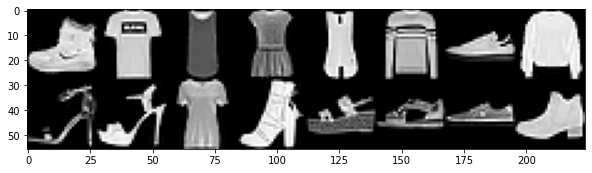

In [49]:
img   = utils.make_grid(images, padding=0)
npimg = img.numpy()
plt.figure(figsize=(10, 7))
plt.imshow(np.transpose(npimg, (1,2,0)))
plt.show()

In [50]:
print(labels)

tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9])


In [51]:
CLASSES = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}


for label in labels:
    index = label.item()
    print(CLASSES[index])

Ankle boot
T-shirt/top
T-shirt/top
Dress
T-shirt/top
Pullover
Sneaker
Pullover
Sandal
Sandal
T-shirt/top
Ankle boot
Sandal
Sandal
Sneaker
Ankle boot


(28, 28)


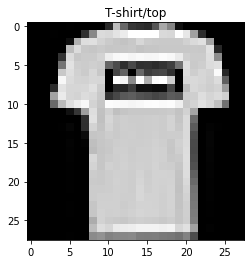

In [52]:
idx = 1

item_img = images[idx]
item_npimg = item_img.squeeze().numpy()
plt.title(CLASSES[labels[idx].item()])
print(item_npimg.shape)
plt.imshow(item_npimg, cmap='gray')
plt.show()

# **인공신경망으로 데이터 분류하기**

> neural net 으로 패션 아이템 분류

In [0]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import transforms, datasets

In [0]:
USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device("cuda" if USE_CUDA else "cpu")

In [0]:
EPOCHS = 30
BATCH_SIZE = 64

## **데이터셋 가져오기**

In [0]:
transform = transforms.Compose([
    transforms.ToTensor()
])

In [0]:
trainset = datasets.FashionMNIST(
    root      = './.data/', 
    train     = True,
    download  = True,
    transform = transform
)
testset = datasets.FashionMNIST(
    root      = './.data/', 
    train     = False,
    download  = True,
    transform = transform
)

train_loader = torch.utils.data.DataLoader(
    dataset     = trainset,
    batch_size  = BATCH_SIZE,
    shuffle     = True,
)
test_loader = torch.utils.data.DataLoader(
    dataset     = testset,
    batch_size  = BATCH_SIZE,
    shuffle     = True,
)

# **뉴럴넷으로 Fashion MNIST 학습하기**

> 입력 x 는 [배치크기, 색, 높이, 넓이]로 이루어져 있다. x.size()를 해보면 [64, 1, 28, 28]이라고 표시되는 것을 보실 수 있다. Fashion MNIST에서 이미지의 크기는 28 x 28, 색은 흑백으로 1 가지다. 그러므로 입력 x의 총 특성값 갯수는 28 x 28 x 1, 즉 784개.

>우리가 사용할 모델은 3개의 레이어를 가진 인공신경망.

In [0]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 784)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# **모델 준비하기**

> to() 함수는 모델의 파라미터들을 지정한 곳으로 보내는 역할을 합니다. 일반적으로 CPU 1개만 사용할 경우 필요는 없지만, GPU를 사용하고자 하는 경우 to("cuda")로 지정하여 GPU로 보내야 합니다. 지정하지 않을 경우 계속 CPU에 남아 있게 되며 빠른 훈련의 이점을 누리실 수 없습니다.

> 최적화 알고리즘으로 파이토치에 내장되어 있는 optim.SGD를 사용하겠습니다.

In [0]:
model        = Net().to(DEVICE)
optimizer    = optim.SGD(model.parameters(), lr=0.01)

In [0]:
# 학습하기

def train(model, train_loader, optimizer):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        # 학습 데이터를 DEVICE의 메모리로 보냄
        data, target = data.to(DEVICE), target.to(DEVICE)
        optimizer.zero_grad()
        output = model(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()

In [0]:
# 테스트하기

def evaluate(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(DEVICE), target.to(DEVICE)
            output = model(data)

            # 모든 오차 더하기
            test_loss += F.cross_entropy(output, target,
                                         reduction='sum').item()
            
            # 가장 큰 값을 가진 클래스가 모델의 예측입니다.
            # 예측과 정답을 비교하여 일치할 경우 correct에 1을 더합니다.
            pred = output.max(1, keepdim=True)[1]
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    return test_loss, test_accuracy

In [62]:
for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer)
    test_loss, test_accuracy = evaluate(model, test_loader)
    
    print('[{}] Test Loss: {:.4f}, Accuracy: {:.2f}%'.format(
          epoch, test_loss, test_accuracy))

[1] Test Loss: 0.8371, Accuracy: 69.12%
[2] Test Loss: 0.6610, Accuracy: 77.00%
[3] Test Loss: 0.5899, Accuracy: 79.16%
[4] Test Loss: 0.5432, Accuracy: 81.04%
[5] Test Loss: 0.5162, Accuracy: 82.05%
[6] Test Loss: 0.5069, Accuracy: 82.20%
[7] Test Loss: 0.5086, Accuracy: 81.71%
[8] Test Loss: 0.4727, Accuracy: 83.43%
[9] Test Loss: 0.4908, Accuracy: 82.56%
[10] Test Loss: 0.4584, Accuracy: 83.88%
[11] Test Loss: 0.4573, Accuracy: 83.73%
[12] Test Loss: 0.4479, Accuracy: 83.91%
[13] Test Loss: 0.4321, Accuracy: 84.72%
[14] Test Loss: 0.4360, Accuracy: 84.74%
[15] Test Loss: 0.4252, Accuracy: 85.03%
[16] Test Loss: 0.4212, Accuracy: 85.10%
[17] Test Loss: 0.4311, Accuracy: 84.67%
[18] Test Loss: 0.4317, Accuracy: 84.90%
[19] Test Loss: 0.3978, Accuracy: 85.87%
[20] Test Loss: 0.4197, Accuracy: 85.29%
[21] Test Loss: 0.4050, Accuracy: 85.88%
[22] Test Loss: 0.4305, Accuracy: 84.17%
[23] Test Loss: 0.3924, Accuracy: 86.18%
[24] Test Loss: 0.4013, Accuracy: 85.45%
[25] Test Loss: 0.3802, A

# **overfitting과 정규화**

In [0]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import transforms, datasets

In [0]:
USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device("cuda" if USE_CUDA else "cpu")

In [0]:
EPOCHS = 50
BATCH_SIZE = 64

## **데이터셋 노이즈 추가하기**

In [67]:
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('./.data',
                   train=True,
                   download=True,
                   transform=transforms.Compose([
                       transforms.RandomHorizontalFlip(),
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=BATCH_SIZE, shuffle=True)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('./.data',
                   train=False, 
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=BATCH_SIZE, shuffle=True)

Extracting ./.data/MNIST/raw/train-images-idx3-ubyte.gz to ./.data/MNIST/raw


Extracting ./.data/MNIST/raw/train-labels-idx1-ubyte.gz to ./.data/MNIST/raw


Extracting ./.data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./.data/MNIST/raw


Extracting ./.data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./.data/MNIST/raw
Processing...
Done!


# **뉴럴넷으로 Fashion MNIST 학습하기**

> 입력 x 는 [배치크기, 색, 높이, 넓이]로 이루어져 있다. x.size()를 해보면 [64, 1, 28, 28]이라고 표시되는 것을 보실 수 있다. Fashion MNIST에서 이미지의 크기는 28 x 28, 색은 흑백으로 1 가지 입니다. 그러므로 입력 x의 총 특성값 갯수는 28 x 28 x 1, 즉 784개 입니다.

우리가 사용할 모델은 3개의 레이어를 가진 뉴럴네트워크 입니다.

In [0]:
class Net(nn.Module):
    def __init__(self, dropout_p=0.2):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)
        # 드롭아웃 확률
        self.dropout_p = dropout_p

    def forward(self, x):
        x = x.view(-1, 784)
        x = F.relu(self.fc1(x))
        # 드롭아웃 추가
        x = F.dropout(x, training=self.training,
                      p=self.dropout_p)
        x = F.relu(self.fc2(x))
        # 드롭아웃 추가
        x = F.dropout(x, training=self.training,
                      p=self.dropout_p)
        x = self.fc3(x)
        return x

In [0]:
model        = Net(dropout_p=0.2).to(DEVICE)
optimizer    = optim.SGD(model.parameters(), lr=0.01)

In [0]:
def train(model, train_loader, optimizer):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(DEVICE), target.to(DEVICE)
        optimizer.zero_grad()
        output = model(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()

In [0]:
def evaluate(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(DEVICE), target.to(DEVICE)
            output = model(data)
            test_loss += F.cross_entropy(output, target,
                                         reduction='sum').item()
            
            # 맞춘 갯수 계산
            pred = output.max(1, keepdim=True)[1]
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    return test_loss, test_accuracy

In [74]:
for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer)
    test_loss, test_accuracy = evaluate(model, test_loader)
    
    print('[{}] Test Loss: {:.4f}, Accuracy: {:.2f}%'.format(
          epoch, test_loss, test_accuracy))

[1] Test Loss: 0.5408, Accuracy: 82.55%
[2] Test Loss: 0.4151, Accuracy: 87.32%
[3] Test Loss: 0.3369, Accuracy: 89.59%
[4] Test Loss: 0.2780, Accuracy: 91.35%
[5] Test Loss: 0.2423, Accuracy: 92.76%
[6] Test Loss: 0.2192, Accuracy: 93.42%
[7] Test Loss: 0.2045, Accuracy: 93.65%
[8] Test Loss: 0.1882, Accuracy: 94.20%
[9] Test Loss: 0.1795, Accuracy: 94.40%
[10] Test Loss: 0.1683, Accuracy: 94.84%
[11] Test Loss: 0.1598, Accuracy: 95.09%
[12] Test Loss: 0.1531, Accuracy: 95.35%
[13] Test Loss: 0.1450, Accuracy: 95.51%
[14] Test Loss: 0.1426, Accuracy: 95.50%
[15] Test Loss: 0.1368, Accuracy: 95.73%
[16] Test Loss: 0.1337, Accuracy: 95.85%
[17] Test Loss: 0.1303, Accuracy: 96.11%
[18] Test Loss: 0.1269, Accuracy: 96.06%
[19] Test Loss: 0.1193, Accuracy: 96.26%
[20] Test Loss: 0.1202, Accuracy: 96.30%
[21] Test Loss: 0.1156, Accuracy: 96.30%
[22] Test Loss: 0.1153, Accuracy: 96.43%
[23] Test Loss: 0.1134, Accuracy: 96.56%
[24] Test Loss: 0.1129, Accuracy: 96.33%
[25] Test Loss: 0.1068, A